# Testing notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
from utils import preprocess_captions

preprocess_captions()

In [4]:
from dataset import CaptionDataset, Vocabulary, collate_fn
from torchvision import transforms 
import torch
import matplotlib.pyplot as plt

In [45]:
vocab = Vocabulary()
vocab.load()

In [79]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), 
                         (0.229, 0.224, 0.225))])

transform_nonorm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()])



In [85]:
train_dataset = CaptionDataset(split="TRAIN",
                               transform=transform
                                )

train_loader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=32,
                                               shuffle=False,
                                               num_workers = 4,
                                               collate_fn=collate_fn
                                              )

val_dataset = CaptionDataset(split="VAL",
                               transform=transform
                                )

val_loader = torch.utils.data.DataLoader(val_dataset,
                                               batch_size=32,
                                               shuffle=False,
                                               num_workers = 4,
                                               collate_fn=collate_fn
                                              )

test_dataset = CaptionDataset(split="TEST",
                               transform=transform
                                )

test_loader = torch.utils.data.DataLoader(test_dataset,
                                               batch_size=32,
                                               shuffle=False,
                                               num_workers = 4,
                                               collate_fn=collate_fn
                                              )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['<start>', 'brown', 'dog', 'in', 'the', 'snow', 'has', 'something', '<unk>', 'pink', 'in', 'its', 'mouth', '<end>']


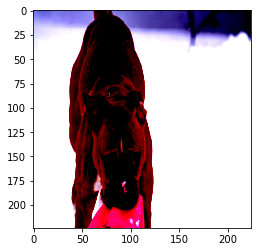

In [86]:
image, target = train_loader.dataset[1]
plt.imshow(image.permute(1, 2, 0))
decoded_c = [vocab.index[str(idx)] for idx in target.int().numpy()]
print(decoded_c)

In [ ]:
for (images, captions, lengths) in train_loader:
    
    break